# Lab 2. PyTorch models

---

How to Use This Notebook
---

**Recommended Setup**
- For the best experience, **run this notebook on [Google Colab](https://colab.research.google.com/)**—especially if your local machine is slow.  
- In Colab, **enable GPU support** by going to:  
  `Runtime > Change runtime type > Hardware accelerator > GPU`


**Homework Tasks**

 - Homework tasks are clearly marked throughout the notebook in the following format:

   > ---

   > <span style="color:red"><b>TASK X</b> - [<i>some text</i>]:</span>

   > ---

   > ```Your code ....```

   > ---

   > *End of Task X.* [*Instructions for passing*]

 - For each task:
   - **Complete the code** where indicated.
   - **Upload the required results** from each task to **Homework 2 – Code** on [NextIlearn](https://nextilearn.dsv.su.se).

 - Once you've finished all the tasks:
   Submit your **entire completed notebook (including your code!)** to **Homework 2 – Notebook** on [NextIlearn](https://nextilearn.dsv.su.se).

**Important:**  
Your submission will **only be graded if both files** (code + notebook) are uploaded **before the deadline**. Late submissions are **not accepted**, regardless of technical issues like bad internet connection.

---

This lab will teach how to use PyTorch by making a simple neural network model. Regradless of model's complexity, creating any model can be completed in a similar way. We will use the **Fashion MNIST** dataset, one of the variants of the MNIST dataset. It has the same property as a normal MNIST, with the same size (28*28) and the same number of classes (10), but the images represent fashion items rather than handwritten digits, which means it might have more complexity than normal MNIST.

Because of its complexity in each class, the problem is significantly more challenging than normal MNIST. For example, a simple linear model reaches about 92% accuracy on MNIST, but only about 83% on Fashion MNIST. Below is an example of Fashion MNIST.


![alt text](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)


In today's lab, we will first try to create a simple fully connected network model and check its basic performance on Fashion MNIST.

Based on your local machine's performance, the task might take a long time, so it is recommended to use the [Google Colab](https://colab.research.google.com/) since it can handle the lab contents with no processing bottleneck.

### Contents

- Import PyTorch and load a sample dataset
- Sequential fully connected network
- Other useful functions (Saving/Loading)

### 全连接神经网络的处理步骤：
* 1. 输入处理后的数据：我们输入处理后的数据，但是要注意的是这个数据一般是一个张量（Tensor）


* 2. 前向传播：我们的数据会在神经网络中传播，从输入层传入线性层`nn.Linear`进行线性变换，然后传入我们的激活函数（**Relu,sigmoid**等），最后到达输出层（一般都是Linear层）


* 3. 计算损失函数：此时我们的模型会得到预测的结果，我们进行比较并且使用损失函数计算损失值，分类问题一般使用`CrossEntropyLoss`，回归一般使用`MSELoss`


* 4. 反向传播：然后使用链式法则计算我们的每一个预测结果的梯度（和真实的值的差异）


* 5. 梯度更新：我们在这里根据我们得到的梯度来更新我们的模型的参数，让我们的下一轮的表现更好
     
 
* 6. 验证：使用验证集验证我们的这个epoch的模型，判断和我们的真实标签差别，每一个epoch一次（valdata）


* 7. 下一轮训练：用新的参数再次进行一轮训练


* 8. 测试:当我们的模型训练完后，使用一次测试集，对我们的模型的准确度进行判断，进行测试(testdata)


### 一般什么时候停止模型的训练呢？
* 我们一般在：
* 1.模型达到了预设定的轮数

* 2.模型的验证集的loss已经不再减少

* 3.模型的loss已经很小

### 我们的jupyter怎么写？

**记住切换为markdown模式**
### 标题：使用###

* 小标题：使用*加上一个空格

代码：使用两个`Dataset`英文的一飘（`），表示所有格的缩写

加粗:使用** 加粗 **， 注意没有我的*号之间没有空格

普通文字：直接写

*斜体*：直接用（* + 我们的文字 + *）,注意星号和我们的文字之间没有空格

注意*jupyter*没有自动换行，需要每一行之间留空一行

### Section 1: Import PyTorch and load a sample dataset


You should be able to install PyTorch by using `pip`. You do not need to specify a GPU version.

In [ ]:
%%capture
!pip install numpy torch

In [2]:
import torch as pt

In [3]:
import numpy as np

In [3]:
# version?
pt.__version__

'2.6.0+cpu'

We will use the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) data available in github, which has 70,000 article images. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

Since it is on github we can simple get it by using `git clone [repo] [folder]`:

In [4]:
!git clone https://github.com/zalandoresearch/fashion-mnist data

fatal: destination path 'data' already exists and is not an empty directory.


#### Dataset handling: Traditional way with scikit-learn

Datasets can be found in diverse locations -- e.g. on [github](https://github.com/), [zenodo](https://zenodo.org/), [huggingface](https://huggingface.co/docs/hub/en/datasets), [kaggle](https://www.kaggle.com/datasets) or **your companies server**. Some Python modules like `torch` and `tensorflow` also have their own easy-to-use versions of standard datasets specialised to the specific library. For a fast, but less general alternative to this tutorial, see [here](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html). **The linked tutorial is for interrested students and not part of this assignment!**

If the dataset is hosted on github or similar, the first step is to check the description: [https://github.com/zalandoresearch/fashion-mnist](https://github.com/zalandoresearch/fashion-mnist#get-the-data)

Lets check out the `mnist_reader` they mention:

In [5]:
!cat data/utils/mnist_reader.py # linux / mac
#!type data\utils\mnist_reader.py # windows

'cat' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


What values does the parameter `kind` take?

In [4]:
import os
os.listdir('data/data/fashion')

['t10k-images-idx3-ubyte.gz',
 't10k-labels-idx1-ubyte.gz',
 'train-images-idx3-ubyte.gz',
 'train-labels-idx1-ubyte.gz',
 'unzipped']

Let's load the data:

In [88]:
# import mnist_reader:
import data.utils.mnist_reader as mnist_reader

In [8]:
# load data:
X_train_full, y_train_full = mnist_reader.load_mnist('data/data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/data/fashion', kind='t10k')

This dataset is loaded as a NumPy array which we learned before in Lab 1. You can use all the methods you learned to check the properties of the dataset, like **shape** or **describe**.

In [9]:
# type?
type(X_train_full)

numpy.ndarray

In [10]:
# shape?
X_train_full.shape, X_test.shape

((60000, 784), (10000, 784))

In [11]:
np.unique(y_train_full)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

As the dataset is composed of grayscale pixels, the datatype of it is unsigned integer. The dataset also has a pixed range [0, 255] so it does not need to take higher bit than 8.

In [12]:
# dtype?
X_train_full.dtype

dtype('uint8')

Besides that, PyTorch models are also usually evaluated by one more separate set called validation set as training is an iterative and time-consuming process and we do not know when we need to stop clearly. So we would like to estimate the right time to interrupt the training process by checking its performance for each iteration.

To create a validation set, there can be many options, we can explicitly split the dataset using index, or we can just use a training set but with the option stating we want to validate, when we actually fit the model. However, this time we will use scikit-learn's `train_test_split` method to create a validation set as it can provide a nice stratification option.

We need a simiple normalization - as we all know the graysclae ranges from 0 to 255...

In [13]:
# Introduced in the coursebook

#为什么要除以255呢？因为我们的灰度图的像素是255，神经网络更喜欢0到1的数据，所以说我们需要除以255
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [14]:
X_test = X_test / 255.

---

<span style="color:red"><b>TASK 1</b> - Stratified Split:</span>

---

Replace the above simple training/validation split with a **stratified** one (50% train, 50% validation):
  - Use `X_train_full` and `y_train_full`
  - Enable `shuffle` and `stratification`

Use [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Print and check their shapes afterward!

In [5]:
from sklearn.model_selection import train_test_split

# normalize:
X_train_full = X_train_full / 255.


#需要注意的是，在这里面如果stratify的值是None的话会进行随机的划分
#，如果指定了值的话会根据指定的标签来均匀的划分数据
# split data:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, 
                                                      y_train_full,
                                                      shuffle= True, 
                                                      test_size= 0.5, 
                                                      train_size= 0.5, 
                                                      stratify= y_train_full)

NameError: name 'X_train_full' is not defined

In [16]:
# shape?
#continue

#.shape 是 NumPy 数组（ndarray） 
#或 PyTorch 张量（Tensor） 的一个 属性（attribute），表示这个数组/张量的形状（尺寸）

#a = np.array([1, 2, 3, 4])
#print(a.shape)   # (4,)
#上面指这是一个一维数组，它的长度是4

#b = np.array([[1, 2, 3], [4, 5, 6]])
#print(b.shape)   # (2, 3)
#返回的值指的是我们的这个nparray是两行3列的数组


X_train.shape
#这里的shape是指我们的这个训练集是一个有着55000个样本（图），
#每张图片的像素值是784的训练集

(30000, 784)

---

*End of Task 1. Copy your final code to **Homework 2 - Code** on **NextIlearn***

Here we prepared the class names of the fashion MNIST dataset for your convenience.

In [17]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [18]:
# Use the numeric label to get the class name, e.g:
class_names[0]

'T-shirt/top'

We can also try to see each data instance by using **plt.imshow**.

In [ ]:
#这一段代码主要是用来进行训练图像的导出，
#我们导入了pyplot，这个类相当于python画图的print()
#其中我们提取出每一个训练集中的值，并且把他们重新reshape成28乘以28的灰度图，
#然后指定了我们的cmap是指定显示为灰度图，imshow是显示图像的一个方法
#其实不使用show()方法的话，也没有问题，使用show()只是为了确保我们的图像一定会显示而已

import matplotlib.pyplot as plt
i = np.random.randint(0, X_train.shape[0])
plt.imshow(X_train[i].reshape((28, 28)), cmap='gray') # cmap to make it recognize grayscale
plt.xlabel(class_names[y_train[i]])
plt.show()

#### Optimizing memory consuption using pipelines:

Imagine taking the above approach with very large datasets (e.g. used for training modern LLMs). Loading all the data before training would exceed RAM and VRAM of almost any computer.

Therefore, we are going to use the [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) API:

---
***An abstract class representing a Dataset.***

*All datasets that represent a map from keys to data samples should subclass it. All subclasses should overwrite* `__getitem__()`*, supporting fetching a data sample for a given key. Subclasses could also optionally overwrite* `__len__()`*, which is expected to return the size of the dataset by many Sampler implementations and the default options of DataLoader. Subclasses could also optionally implement* `__getitems__()`*, for speedup batched samples loading. This method accepts list of indices of samples of batch and returns list of samples.*

---

In [20]:
#因为我们的数据如果一次加载到内存的话会崩溃(太多了)，
#所以使用这个类一次一次加载我们训练时候的数据

In [ ]:
from numpy.typing import NDArray
from typing import Tuple
from torch.utils.data import Dataset

class FashionMNIST(Dataset):
    #初始化函数，这里的NDArray[]是用来修饰输入的类型，
    #代表了输入的X（数据）是int8类型，y(标签)也是int8类型
    #这里的-> 的意思是指我们这个函数返回的值为None
  def __init__(self, X:NDArray[np.int8], y:NDArray[np.int8]) -> None:
    # normalize:
    #这里是做了归一化，因为我们的图象是灰阶图，
    #除以255把数据变化成机器学习擅长处理的数据（0 - 1）
    self.X = X.astype(np.float32) / 255.0
    self.y = y

    #返回我们的数据集的长度
  def __len__(self) -> int:
    return len(self.y)

#继承了Dataset类之后必须实现__getitem__抽象方法，
#返回了我们的数据以及其标签
  def __getitem__(self, idx:int) -> int:
    return self.X[idx], self.y[idx]

#这里使用修饰器告诉我们以及编译器这是一个静态方法
  @staticmethod
  def create_split(fraction_train:float, fraction_validation:float, fraction_test:float) -> Tuple[Dataset, Dataset, Dataset]:
    #这是一个断言关键字（assertion）当条件为True时，
    #才会继续我们的运行，一旦条件为False，那么就会停止程序
    assert fraction_train + fraction_validation + fraction_test == 1.0

    # load data:
    train = mnist_reader.load_mnist('data/data/fashion', kind='train')
    t10k  = mnist_reader.load_mnist('data/data/fashion', kind='t10k')

    data   = np.concatenate((train[0], t10k[0]), axis=0)
    labels = np.concatenate((train[1], t10k[1]), axis=0)

    # split data:
    #这里的三个n是指具体的样本的数值，
    #我们使用整个数据的长度乘以他们各自所占的比例，得到具体的样本的数量
    n = len(labels)
    n_train = int(n * fraction_train)
    n_validation = int(n * fraction_validation)

    #为什么要三个数据集呢？在深度学习中，一般会使用三个集合，
    #训练集训练数据，验证集调试模型的参数，测试集测试模型的表现
    data_train = FashionMNIST(
        data[:n_train],
        labels[:n_train]
    )
    data_valid = FashionMNIST(
        data[n_train:n_train+n_validation],
        labels[n_train:n_train+n_validation]
    )
    data_test = FashionMNIST(
        data[n_train+n_validation:],
        labels[n_train+n_validation:]
    )

    return data_train, data_valid, data_test

It works like a list of tuples `(X, y)` in Python:

In [22]:
#使用上面创建的create_split静态方法，创建训练集、验证集、测试集
#_表示我们不关心这个变量，和Erlang相似

data, _, _ = FashionMNIST.create_split(.7, .1, .2)

In [23]:
# call to __len__:
len(data)

49000

In [24]:
# call to __getitem__:
data[5]

(array([0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.08627451,
        0.34509805, 0.7372549 , 0.6745098 , 0.5176471 , 0.49019608,
        0.5529412 , 0.78039217, 0.56078434, 0.03529412, 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.        , 0.        , 0.07843138,
        0.5137255 , 0.78039217, 0.80784315, 0.76862746, 0.7921569 ,
        0.9490196 , 1.        , 1.        , 0.98039216, 0.87058824,
        0.77254903, 0.80784315, 0.7372549 , 0.49411765, 0.06666667,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.13725491, 0.8392157 , 0.7490196 , 0.7176471 ,
        0.69803923, 0.6862745 , 0.65882355, 0.5882353 , 0.63529414,
        0.62352943, 0.59607846, 0.61960787, 0.70

But the above implementation still loads everything at the time of instantiation of the `FashionMNIST` class. So let's transform the data into a format that you see more often with big datasets:

In [25]:
# unzip data:
target_dir = 'data/data/fashion/unzipped'
os.makedirs(target_dir, exist_ok=True)

train = mnist_reader.load_mnist('data/data/fashion', kind='train')
t10k  = mnist_reader.load_mnist('data/data/fashion', kind='t10k')

data = np.concatenate((train[0], t10k[0]), axis=0)
labels = np.concatenate((train[1], t10k[1]), axis=0)

#enumerate()是用来同时获取循环中我们的可遍历对象的索引和值，返回一个迭代器对象，
#可以在循环中使用
for i, x in enumerate(data):
    
  #这一步是把所有图片一张一张取出来，
  #然后保存到我们上面创建的unzip文件夹中，其中的i:d代表把每一个i转换成十进制的数
  #其中的join方法是指把一个文件的路径进行链接，它会把多个路径片段组合成一个完整路径，
  #确保中间的 / 或 \ 正确（Mac Windows的分隔符不一样）
  #这个npy文件numpy用来储存的文件，有着load方法和save方法
  file = os.path.join(target_dir, f'img_{i:d}.npy')
    
  #以二进制写入（“wb”）的形式来把打开我们的file文件对象，并且把它保存为numpy数组
  with open(file, 'wb') as f:
    np.save(f, x.reshape((28, 28)))
  
    #.npy 是 NumPy 专用的二进制文件格式，用于保存数组数据。

    #是由 numpy.save() 写入的

    #读取用 numpy.load()
#在循环外使用join，把我们的图片的标签进行储存，并且重新命名成为一个新的文件
with open(os.path.join(target_dir, 'labels.npy'), 'wb') as f:
  np.save(f, labels)

In [26]:
os.listdir(target_dir)[:10]

['img_0.npy',
 'img_1.npy',
 'img_10.npy',
 'img_100.npy',
 'img_1000.npy',
 'img_10000.npy',
 'img_10001.npy',
 'img_10002.npy',
 'img_10003.npy',
 'img_10004.npy']

#### 

---

<span style="color:red"><b>TASK 2</b> - Dataset:</span>

---

Complete the following class.
- It should load every single sample dynamically from disk when it is requested and this way keep memory consumption to a minimum.
- Use your code from Task 1 to create stratified splits using the `stratify` and `shuffle` arguments of `create_split`.
- Use the variable `target_dir` as the path to the unzipped data.
- **Make sure it produces the the right type of outputs (see type hintig and class above)!**

In [27]:
#这一个类的思想是：我们通过一个一个获取刚才我们解压的数据，来最小化性能的消耗，
#避免死机的风险，这个类有两个参数，分别是int32类型的numpy数组indices
#还有就是int8类型的numpy数组，labels。但是直接传参太麻烦了，我们写一个静态方法，
#让我们直接使用类名.静态方法名()这样来方便的创建我们需要的测试集，验证集，训练集

class FashionMNIST(Dataset):
  def __init__(self, indices:NDArray[np.int32], labels:NDArray[np.int8]) -> None:
    self.indices = indices
    self.labels  = labels

  def __len__(self) -> int:
    return len(self.indices)

#这里面首先定义一个i，这个i是我们前面解压的图片的编号，每一个图片只有i不同，
#然后命名一个file_path用来生成并且存放图片的地址，因为我们的图片都是以npy格式储存的
#所以说我们直接使用load方法加载图片，并且要记得除以255（像素范围为0-255），
#得到0到1的数据，让神经网络方便学习，并且因为我们使用的是numpy数组来处理，所以要转化类型
#为储存float32数据的numpy数组，float32更可以储存详细的图片的信息
    
#最后根据想要的索引获取我们的图片的标签
#并且要转化成我们数字的格式方便神经网络使用    
  def __getitem__(self, idx:int) -> int:
      i = self.indices[idx]
      file_path = os.path.join(target_dir, f'img_{i}.npy')
      image = np.load(file_path).astype(np.float32)/255.0
      label = int(self.labels[idx])
      return image, label
      
      # complete

#这个静态方法简化了我们的传参过程，并且还把数据划分为了我们需要的测试集、验证集、训练集
#首先是找到我们解包的标签文件，转化成为数字类型（int8），然后用它来生成了我们的索引，
#从0开始，一共有标签个的索引（也就是全部图片个数的索引）
#然后我们进行判断，因为这个函数是否采用分层抽样是根据我们的标签决定的，
#所以说只有判断我们输入了这个参数为True的情况下才可以对数据进行分层抽样
  @staticmethod
  def create_split(fraction_train:float, fraction_validation:float, fraction_test:float, stratify:bool=True, shuffle:bool=True) -> Tuple[Dataset, Dataset, Dataset]:
    assert fraction_train + fraction_validation + fraction_test == 1.0
    label_path = os.path.join(target_dir, 'labels.npy')
    all_labels = np.load(label_path).astype(np.int8)
    all_indeces = np.arange(len(all_labels), dtype=np.int32)

    if stratify == True:
        stratify_method = all_labels
    else:
        stratify_method = None
        
#我们的train_test_split()方法只能返回训练集和测试集，怎么办呢？ ：
#我们用两次！先划分为训练集和剩余集，然后再在剩余集中划分我们的测试集和验证集
      
    idx_train, idx_rest, y_train, y_rest = train_test_split(               all_indeces, 
                                                                           all_labels,
                                                                           train_size=fraction_train,
                                                                           stratify= stratify_method,
                                                                           shuffle=True,
                                                                           random_state=42
                                                            )
    
    rate_validation_rest = fraction_validation / (fraction_test + fraction_validation)
      
    if stratify == True:
      stratify_method_rest = y_rest
    else:
      stratify_method_rest = None  
    idx_validation, idx_test, y_validation, y_test = train_test_split(idx_rest,
                                                                      y_rest,
                                                                      train_size=rate_validation_rest,
                                                                      stratify=stratify_method_rest,
                                                                      shuffle=True,
                                                                      random_state=42,        
                                                                    )
    #我们在这里进行各个集的划分，并且返回类的对象，
    #这些数据集现在只有索引，没有数据，当需要的时候我们的数据才会加载到我们的内存。
    data_train = FashionMNIST(idx_train, y_train)
    data_valid = FashionMNIST(idx_validation, y_validation)
    data_test = FashionMNIST(idx_test, y_test)
    # complete
    
    return data_train, data_valid, data_test

---

*End of Task 2. Copy your final code to **Homework 2 - Code** on **NextIlearn***

Our objective is to create a model with the high accuracy on this dataset. Let's start to create our first model!

**Shuffling and batching**: Using [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader), you can easily shuffle and batch the dataset.

In [6]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32

In [80]:
data_train, data_valid, data_test = FashionMNIST.create_split(.7, .1, .2)

In [81]:
#Epoch 是机器学习中一个完整的“遍历训练集的轮数”。
#num_workers 是机器学习时候的线程数，可以设置为cpu的核心数

In [3]:
loader_train = DataLoader(data_train,             # dataset from which to load the data. 数据从哪里来
                          batch_size=BATCH_SIZE,  # how many samples per batch to load (default: 1). 一个分支多少个数据
                          shuffle=True,           # set to True to have the data reshuffled at every epoch (default: False). 每一次划分是否打乱数据
                          sampler=None,           # defines the strategy to draw samples from the dataset. 
                                                  # Can be any Iterable with __len__ implemented. 如果不用shuffer随机打乱也想筛选数据
                                                  # If specified, shuffle must not be specified. 和shuffle冲突
                          batch_sampler=None,     # like sampler, but returns a batch of indices at a time. 
                                                  # Mutually exclusive with batch_size, shuffle, sampler, and drop_last. 和sample类似，但是返回的是索引集合
                          drop_last=False)        # set to True to drop the last incomplete batch, 
                                                  #if the dataset size is not divisible by the batch size. 如果最后一个数据不够batch，那么是否丢弃
                                                  # If False and the size of dataset is not divisible by the batch size, 
                                                  #then the last batch will be smaller. (default: False)

NameError: name 'DataLoader' is not defined

In [83]:
# validation set does not need to be repeated and shuffled since it all will be used at once - but MUST be batched.
loader_valid = DataLoader(data_valid,
                          batch_size=BATCH_SIZE,
                          shuffle=False,
                          sampler=None,
                          batch_sampler=None,
                          drop_last=False)

In [84]:
# test set does not need to be repeated and shuffled since it all will be used at once - but MUST be batched.
loader_test  = DataLoader(data_test,
                          batch_size=BATCH_SIZE,
                          shuffle=False,
                          sampler=None,
                          batch_sampler=None,
                          drop_last=False)

In [34]:
#为什么我们要使用多个batch呢？
# 1.数据量很大，我们的测试集、训练集、验证集都是大数据，
#不使用batch分块的话很容易爆内存

# 2.我们的训练集，每一个训练轮回（epoch）都要进行数据的打乱，
#不然模型可能会学到我们的数据的顺序

# 3.验证集，测试集，是因为他们的数据量大，但是他们只会使用一次进行评估模型的表现以及调试参数，
#所以说我们也要使他们划分成batch但是不进行shuffle

### Section 2: Sequential fully connected network （如何创建一个全连接神经网络）

#### Instantiating the network（实例化网络模型/创建网络）:

The standard way to create a PyTorch model is to override the [`torch.nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module) class. To create a model you need to override the following methods:
- `__init__(self, ...) -> None`: Initializes the module and instantiates all the layers and functions.
- `forward(self, x) -> y`: implements the forward pass through the network.

When you create a layer (e.g. [`torch.nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear)), you should specify **in_features** and **out_features**. Don't forget to apply an **activation function** in the forward pass.

In [35]:
#在init方法中我们应该创建我们的神经网络的每一层线性层，每一层线性层！
#在forward方法中是我们在神经网络进行的过程的激活函数的添加，为我们的函数添加非线性特性

#运行的顺序，在我们初始化模型后，首先调用了__init__()方法，
#这样会创建我们的神经网络的每一层，并且以属性的形式储存在我们的模型对象中

#我们在创建了我们的神经网络对象后，使用对象名(参数)的方式，
#这样会被Model中的__call__方法拦截，调用我们的forward方法，实现我们的网络的非线性化以及输出结果的操作

In [7]:
import torch.nn as nn
import torch.nn.functional as F


#Fashion MNIST 中的图像是：
#每张图像大小：28 × 28 像素
#是灰度图（1 个通道）
#但神经网络的全连接层需要一维向量作为输入，所以你要先把图像展平成一维，输入in_features = 784
#我们的隐藏层（hidden_size）的通常取值有：64，128，256，512，
#值越大我们的模型越细致，越容易过拟合以及训练时间更长

#outer_features一般是我们的的数据有多少类就选择多少，比如我们的这个数据集里面，
#我们的数据一共有10类，那么我们的outer_features一般建议选择10
#bias是指我们的神经网络的这一层是否加入偏置项

class CustomNetwork(nn.Module):
    def __init__(self) -> None:
        #必须调用父类的这个方法，因为它实际上是把nn.Module中的神经网络相关的方法加载进了我们的项目，我们要使用这些功能
        super().__init__()
        #我们定义了一个神经网络中间层的线性对象，赋值给了我们当前神经网络模型的属性layer1
        self.layer1 = nn.Linear(in_features=784, out_features=100, bias=True)
        #这里的in_features是上面一层输入的100
        self.layer2 = nn.Linear(in_features=100, out_features=len(class_names), bias=True)

    def forward(self, x:pt.Tensor) -> pt.Tensor:
        #这里是定义了第一层的输出，我们的输出实际上是self.layer1，但是他是线性的，
        #要在forward里面加上激活函数

        #为什么我们的self.layer1/2明明是一个属性，还是可以像函数一样调用？
        #因为我们的父类实现了__call__方法，所以可以直接把对象当成函数使用，注意我们的对象是（self.layer1/2）
        #所以self.layer1/2 实际上是等于： nn.Linear(), 我们使用了实现了call方法，
        #所以下面这一句话等于 F.relu(nn.Linear().__call__(x))
        x = F.relu(self.layer1(x))
        return F.softmax(self.layer2(x), dim=-1)

We can visualize the model using **keras.utils.plot_model**. It helps to figue out (or validate) the structure of complete models having multiple paths.

In [37]:
from torchsummary import summary

model = CustomNetwork()
#这里的input_size必须接受一个元组，
#这个元组的结构为：(数据的个数，数量通道数, 高度, 宽度)，
#这里是一个单通道的一维向量，所以输入（784，） 
summary(model, input_size=(784,), device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 100]          78,500
            Linear-2                   [-1, 10]           1,010
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.30
Estimated Total Size (MB): 0.31
----------------------------------------------------------------


Summarization of model parameters is only possible when the model has an input information as it needs to calculate the fully connected parameters from the input layer.

A model instance has various attributes to get layers, weights - which are just for your reference to check the real values.

In [38]:
# You can get a generator object of properties of type `torch.nn.Module` using `children()`:
# !!! in order of instantiation !!!
list(model.children())

[Linear(in_features=784, out_features=100, bias=True),
 Linear(in_features=100, out_features=10, bias=True)]

In [39]:
list(model.named_children())

[('layer1', Linear(in_features=784, out_features=100, bias=True)),
 ('layer2', Linear(in_features=100, out_features=10, bias=True))]

In [40]:
model.get_submodule('layer1')

Linear(in_features=784, out_features=100, bias=True)

In [41]:
# All modules in the model (including itself):
list(model.named_modules())

[('',
  CustomNetwork(
    (layer1): Linear(in_features=784, out_features=100, bias=True)
    (layer2): Linear(in_features=100, out_features=10, bias=True)
  )),
 ('layer1', Linear(in_features=784, out_features=100, bias=True)),
 ('layer2', Linear(in_features=100, out_features=10, bias=True))]

In [42]:
# You can get a generator object of parameters (weights) for each submodule using `parameters()`:
# !!! in order of instantiation !!!
list(model.parameters())[:2]

[Parameter containing:
 tensor([[-0.0082, -0.0251,  0.0126,  ..., -0.0104,  0.0314,  0.0181],
         [-0.0200,  0.0178, -0.0053,  ...,  0.0121, -0.0273,  0.0209],
         [-0.0253,  0.0153, -0.0076,  ...,  0.0234,  0.0111,  0.0129],
         ...,
         [ 0.0354,  0.0019, -0.0270,  ...,  0.0039,  0.0096,  0.0071],
         [-0.0334,  0.0171, -0.0323,  ..., -0.0190,  0.0126,  0.0099],
         [-0.0011, -0.0146, -0.0234,  ..., -0.0103,  0.0257,  0.0074]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0211,  0.0289, -0.0188,  0.0356,  0.0275,  0.0307,  0.0247, -0.0296,
          0.0041, -0.0209, -0.0175,  0.0339, -0.0271, -0.0135,  0.0189,  0.0156,
          0.0116, -0.0127,  0.0302, -0.0151, -0.0293,  0.0357, -0.0095,  0.0249,
         -0.0241,  0.0285, -0.0244, -0.0178, -0.0166,  0.0344, -0.0095, -0.0326,
          0.0357, -0.0066, -0.0185, -0.0087, -0.0028, -0.0357,  0.0236, -0.0232,
         -0.0204,  0.0350,  0.0060,  0.0330,  0.0316,  0.0221,  0.0306,  0.0163

In [43]:
list(model.named_parameters())[:2]

[('layer1.weight',
  Parameter containing:
  tensor([[-0.0082, -0.0251,  0.0126,  ..., -0.0104,  0.0314,  0.0181],
          [-0.0200,  0.0178, -0.0053,  ...,  0.0121, -0.0273,  0.0209],
          [-0.0253,  0.0153, -0.0076,  ...,  0.0234,  0.0111,  0.0129],
          ...,
          [ 0.0354,  0.0019, -0.0270,  ...,  0.0039,  0.0096,  0.0071],
          [-0.0334,  0.0171, -0.0323,  ..., -0.0190,  0.0126,  0.0099],
          [-0.0011, -0.0146, -0.0234,  ..., -0.0103,  0.0257,  0.0074]],
         requires_grad=True)),
 ('layer1.bias',
  Parameter containing:
  tensor([ 0.0211,  0.0289, -0.0188,  0.0356,  0.0275,  0.0307,  0.0247, -0.0296,
           0.0041, -0.0209, -0.0175,  0.0339, -0.0271, -0.0135,  0.0189,  0.0156,
           0.0116, -0.0127,  0.0302, -0.0151, -0.0293,  0.0357, -0.0095,  0.0249,
          -0.0241,  0.0285, -0.0244, -0.0178, -0.0166,  0.0344, -0.0095, -0.0326,
           0.0357, -0.0066, -0.0185, -0.0087, -0.0028, -0.0357,  0.0236, -0.0232,
          -0.0204,  0.0350,

In [44]:
model.get_parameter('layer1.weight')

Parameter containing:
tensor([[-0.0082, -0.0251,  0.0126,  ..., -0.0104,  0.0314,  0.0181],
        [-0.0200,  0.0178, -0.0053,  ...,  0.0121, -0.0273,  0.0209],
        [-0.0253,  0.0153, -0.0076,  ...,  0.0234,  0.0111,  0.0129],
        ...,
        [ 0.0354,  0.0019, -0.0270,  ...,  0.0039,  0.0096,  0.0071],
        [-0.0334,  0.0171, -0.0323,  ..., -0.0190,  0.0126,  0.0099],
        [-0.0011, -0.0146, -0.0234,  ..., -0.0103,  0.0257,  0.0074]],
       requires_grad=True)

---

<span style="color:red"><b>TASK 3</b> - Simple Network:</span>

---

The above network is very simple. Implement a better version with the following layers:
- One **linear input layer** of 300 perceptrons, with a **ReLu** activation function, followed by a **dropout** layer (use the `dropout` parameter for the ratio).
- One **linear hidden layers** of size 200, with a **ReLu** activation function, followed by **dropout** layers (use the `dropout` parameter for the ratio).
- One **linear output layer**, with a **softmax** activation function.

Assume that `torch.nn` is already imported as `nn`. Furthermore, `torch.nn.functional` is available as `F`.

In [45]:
class CustomNetwork(nn.Module):
    def __init__(self, dropout:float=.2) -> None:
        super().__init__()
        self.layer1 = nn.Linear(in_features= 784, out_features= 300, bias= True)
        self.dropout1 = nn.Dropout(p= dropout)
        self.layer2 = nn.Linear(in_features= 300, out_features= 200, bias= True)
        self.dropout2 = nn.Dropout(p= dropout)
        self.output = nn.Linear(in_features= 200, out_features= 10, bias= True)
        #continue

    def forward(self, x:pt.Tensor) -> pt.Tensor:
        x = F.relu(self.layer1(x))
        x = self.dropout1(x)
        x = F.relu(self.layer2(x))
        x = self.dropout2(x)
        x = F.softmax(self.output(x), dim = -1)
        return x 
        #continue

---

*End of Task 3. Copy your final code to **Homework 2 - Code** on **NextIlearn***

**Alternative but more restrictive:** `torch.nn.Sequential`

### 为什么说更加的有着局限性？
1.无法写出复杂的前向逻辑

2.无法传入额外的参数例如：forward(x, y)

3.无法访问中间层（隐藏层）的输出

4.不方便调试，因为无法查看每一层的行为

In [77]:
from torch.nn import Sequential

Unnamed layers:

In [48]:
model = Sequential(
    nn.Linear(in_features=784, out_features=100, bias=True),
    nn.ReLU(),
    nn.Linear(in_features=100, out_features=len(class_names), bias=True),
    nn.Softmax(dim=-1)
)

Named layers:

In [76]:
from collections import OrderedDict


model = Sequential(
    OrderedDict([
        ('layer1',      nn.Linear(in_features=784, out_features=100, bias=True)),
        ('activation1', nn.ReLU()),
        ('layer2',      nn.Linear(in_features=100, out_features=len(class_names), bias=True)),
        ('activation2', nn.Softmax(dim=-1))])
                  )

### Section 3: Training the network:

In PyTorch one needs to define which device to use for computation. All tensors involved in the computation need to be on that device. The most common devices are:
- `cpu`: any of your computer's CPUs
- `cpu:0`:the first of your computer's CPUs
- `cuda`: any of your computer's GPUs
- `cuda:2`: the third GPU of you computer

In [50]:
# get gpu if available else cpu:
device = pt.device("cuda" if pt.cuda.is_available() else "cpu")
device

device(type='cpu')

In [51]:
# move a model or tensor to the device:
model = model.to(device)

Prediction on new instances:

In [52]:
#什么是张量（tensor）？是在pytorch中使用的一种数据类型，
#可以用来储存任何的数据（图片，文字，矩阵等）,在pytorch中，所有的数据操作都是依赖于
#张量（tensor）

In [53]:
X_new = pt.tensor(X_test[:3], dtype=pt.float32, device=device)
y_proba = model(X_new) # this returns a probability?
#下面这一步使用了detach()方法摘除张量和我们的计算图的联系，把张量转化成numpy数组
y_proba = y_proba.detach().cpu().numpy() # to numpy
y_proba

array([[0.10359176, 0.10316145, 0.10157386, 0.10771481, 0.10815857,
        0.09387175, 0.09968138, 0.09457639, 0.08892886, 0.09874113],
       [0.10374948, 0.10163356, 0.09320676, 0.10409319, 0.09297819,
        0.10371773, 0.08816293, 0.10435402, 0.09117378, 0.11693045],
       [0.09568685, 0.10134783, 0.10292954, 0.1086219 , 0.11608744,
        0.09458002, 0.09785486, 0.08976703, 0.08561835, 0.10750625]],
      dtype=float32)

In [54]:
np.array(class_names)[np.argmax(y_proba, axis=1)] #if we want to know the class names

array(['Coat', 'Ankle boot', 'Coat'], dtype='<U11')

Instances of `torch.nn.Module` have a method `.train()` and a method `.eval()` that set the whole module (including submodules) in a training or prediction mode.

This is necessary, as for example dropout layers are inactive during prediction.

In order to train the network, we need to define a training procedure:

In [55]:
#我们的训练模式和预测模式中，dropout和batch的行为不同
#训练模式：dropout会随机丢弃神经元，batch会使用当前的batch进行统计
#预测模式：dropout不会进行丢弃操作，batch会使用训练好的参数
#注意，我们的batch不仅有着分块的作用，还有着统计的作用

In [75]:
import pandas as pd
from sklearn.metrics import f1_score
from typing import Optional, Callable

In [68]:
#我们的epoch函数是代表单次训练轮次，接受的参数有，我们的神经网络模型，数据加载器，
#优化器（更新参数，减少我们的loss），损失函数(衡量我们的模型和真实模型之间的差距的函数)


def epoch(model:CustomNetwork, loader_train:DataLoader, optimizer:pt.optim.Optimizer, loss_fn:Callable[[pt.Tensor, pt.Tensor], pt.Tensor]):
  # 1. set model to train:（转换成训练模式，因为我们的训练模式和预测模式的dropout等会不一样）
  model.train()
    
  #如果没有传入 loss function，losses 就设为 None
  #否则就初始化为空列表，用来记录每个 batch 的 loss
    
  losses = None if loss_fn is None else []
  
  #开启梯度计算环境
  with pt.enable_grad():

    #会自动从数据加载器（dataloader）中提取出我们设定好的一个brach，
    #这里提取了一个brach中的数据和标签，我们的自定义数据类返回的是一个元组，包含着数据和标签
    for X_batch, y_batch in loader_train:
      #展平数据，我们应该展平我们的数据，全连接层要求就是这样，输入只能是一个一维的向量
      #首先我们可以使用reshape或者是view方法，都可以，其中shape方法返回我们的向量的数量，
      #和向量的通道，向量的组成，所以我们取第一个，我们保持向量数量不变
      #再把所有的向量的特征展开到一维上，也就是在后面的参数使用-1，让pytorch自动处理匹配我们的维度
      X_batch = X_batch.view(X_batch.shape[0], -1)

      #我们的y已经是一维向量了，不用重新匹配维度
        
      # move tensors to correct device:
      #把数据移动到正确的设备中去（cpu, gpu），为什么？
      #因为pytorch中我们的数据和训练/评估数据的时候我们的数据和模型必须在同一个设备中
      X_batch = X_batch.to(device)
      y_batch = y_batch.to(device)

      # reset all gradients to zero:
      #只有在使用了backward()的时候才会计算梯度，但是我们的梯度会一直储存着，
      #如果不用zero_grad清空，我们的梯度会一直增加，第一次循环没有梯度，但是第二次循环开始
      #是存在着梯度的，所以说我们管他的先手动清除一次梯度再说
      optimizer.zero_grad()

      # create predictions:
      #将我们的当前的batch中的内容输入进我们的模型，然后使用模型预测出我们的概率
      y_pred = model(X_batch)

      # calculate loss:
      #这里是在使用我们这个batch预测的标签和真正的标签来得到我们当前batch总体的平均损失值
      loss = loss_fn(y_pred, y_batch)
        
      #这里是使用detach方法解除我们的损失和图像的链接，然后把损失放入我们的cpu运行，
      #再把损失转化成numpy数组，因为在gpu中转化成numpy会报错
      #这里是在我们之前定义的losses列表中储存当前的batch的平均损失值，
      #为什么用append呢，因为我们的损失值是float类型，使用extend会报错
      #extend方法的对象必须是一个可迭代的对象，loss不能使用extend
      losses.append(loss_fn(y_pred, y_batch).detach().cpu().numpy())

      # backpropagate loss:
      #计算我们在当前的batch的模型的每一个参数的梯度
      loss.backward()

      # update weights:
      #使用刚刚计算好的梯度更新我们的模型的参数
      optimizer.step()
  
  #返回我们这一轮（epoch）训练的loss的平均值，以便我们之后判断我们的模型是否过拟合或者是否可以提早终止训练
  return np.mean(losses)

In [69]:
#函数接受三个参数，我们已经定义的神经网络模型，
#使用dataloader加载的验证数据集，以及使用Optional修饰的损失函数，代表我们可以选择写或者不写
#里面Callable代表中括号里面的值都是实现了__call__的对象，接受两个张量返回一个张量

def evaluate(model:CustomNetwork, loader_valid:DataLoader, loss_fn:Optional[Callable[[pt.Tensor, pt.Tensor], pt.Tensor]]=None):
  # 1. set model to eval:
  #设置我们的模型为评估模式
  model.eval()

  #创建列表labels储存我们的真实的标签，predictions储存我们的神经网络模型预测的值，
  #如果我们传入了损失函数，那么创建一个空列表来储存计算出的loss
  labels = []
  predictions = []
  losses = None if loss_fn is None else []

  #和我们的epoch中的含义相同，读取当前的batch中的数据和标签
  for X_batch, y_batch in loader_valid:
    #展平数据，我们应该展平数据，不然会报错
    X_batch = X_batch.view(X_batch.shape[0], -1)
      
    # move tensors to correct device:
    #作用是把数据和模型一起放到相同的设备中
    X_batch = X_batch.to(device)
    y_batch = y_batch.to(device)

    #提取出我们的标签的numpy数组，并且因为这个数组实际上是这样的结构[a, b, c],
    #所以使用extend将它迭代之后逐渐存入我们的标签数组，虽然这样会导致我们每一个batch
    #的标签的边界不好判断，但是通常我们都是使用一维标签数组来判断模型整体的效果
    labels.extend(y_batch.cpu().detach().numpy())

    # create predictions:
    #进行模型的评估，得到我们的模型预测的结果（概率），并且加入储存预测label的空列表中
    y_pred = model(X_batch)
    predictions.extend(y_pred.cpu().detach().numpy())

    # calculate loss:
    #使用我们的损失函数来计算我们的loss，并且储存它们到空列表中
    #注意我们不是在进行模型的训练，不需要进行梯度的计算以及模型参数的更新，也就是不用backward以及step
    if loss_fn is not None:
      losses.append(loss_fn(y_pred, y_batch).detach().cpu().numpy())

  # calculate f1 score:
  f1 = f1_score(
    #将我们的实际的标签转化成numpy数组
    #y_batch.cpu().detach().numpy(),这一句有错误，我们的计算f1在函数外，
    #只会计算一次，而我们把所有的标签，预测储存就是为了一次计算
    #这里的标签其实时从0-9，代表不同的类
    np.array(labels),
      
    #将我们的预测结果使用argmax取最大值，其中dim=1代表了我们此时取的是列上面的最大值，这一步是得到我们的模型预测的标签
    #我们模型预测的结果是一个张量，里面包含了每一个样本在不同类别中的得分，所以说我们要选出最高分，这样才代表了我们预测的标签
    #为什么dim=1?因为我们的张量实际上有着样本个数的样本，每一个样本都是一个列表，有着10个（因为有十类标签）得分，
    #所以说选择得分最高的一列做标签而不是dim=0，这样没有意义
    #y_pred.argmax(dim=1).cpu().detach().numpy(),这一句是错误的，我们使用储存好的预测数组进行我们f1分数的计算
    #argmax(axis = 1 )代表在这个数组中每一行中寻找最大的列的索引，返回一个numpy数组
    np.array(predictions).argmax(axis=1),
    #对每个标签类别单独计算F1分数，然后取所有类别F1的平均值
    average='macro'
  )

  if loss_fn is None: return {'f1':f1}
  else: return {'loss':np.mean(losses), 'f1':f1}

In [70]:
#这里是定义了一个训练函数，我们的模型重复训练多轮并且在每一轮训练后都会进行验证，
#记录我们的f1分数后返回到所有的轮次的训练过程

def fit(model:CustomNetwork, loader_train:DataLoader, loader_valid:DataLoader, epochs:int, lr:float):
  # instantiate optimizer:
  #初始化我们的优化器，，指定我们的优化器是随机梯度下降，然后我们的参数是模型的参数，
  #学习率（下降程度）
    
  #其中的parameters()方法是我们继承的方法，返回我们优化器需要调整的各个参数，
  #lr是我们的学习率，需要谨慎调节
  optimizer = pt.optim.SGD(model.parameters(), lr=lr)

  # instantiate loss function:
  #初始化损失函数，这个损失函数适用于多分类问题
  loss_fn = pt.nn.CrossEntropyLoss()

  #用来记录我们每一轮训练的训练loss，验证loss，验证f1分数
  history = []
    
  #遍历我们的训练轮数
  for i in range(epochs):
    # train for one epoch:
    #根据我们上面写的方法来执行我们一轮训练，并且获取训练的loss
    loss_train = epoch(model, loader_train, optimizer, loss_fn)

    # evaluate on validation:
    #此时评估我们经过这一轮训练时的模型
    metrics = evaluate(model, loader_valid, loss_fn)

    # save metrics:
    #把我们这一轮训练的训练损失，验证损失，以及验证f1分数保存起来
    history.append({
      'loss_train':loss_train,
      'loss_valid': metrics['loss'],
      'f1_valid': metrics['f1']
    })

    # print message:
    #打印当前训练的结果
    print(f'Epoch {i+1:d}/{epochs:d}:', *[f'{metric} = {history[-1][metric]:.2f};' for metric in history[-1]], sep='\t')

  # return history:
  return pd.DataFrame(history)

Fit the model for 30 epochs:

Epoch 1/30:	loss_train = 2.28;	loss_valid = 2.23;	f1_valid = 0.07;
Epoch 2/30:	loss_train = 2.14;	loss_valid = 2.01;	f1_valid = 0.39;
Epoch 3/30:	loss_train = 1.92;	loss_valid = 1.84;	f1_valid = 0.60;
Epoch 4/30:	loss_train = 1.83;	loss_valid = 1.80;	f1_valid = 0.60;
Epoch 5/30:	loss_train = 1.79;	loss_valid = 1.76;	f1_valid = 0.66;
Epoch 6/30:	loss_train = 1.77;	loss_valid = 1.74;	f1_valid = 0.71;
Epoch 7/30:	loss_train = 1.74;	loss_valid = 1.72;	f1_valid = 0.73;
Epoch 8/30:	loss_train = 1.72;	loss_valid = 1.70;	f1_valid = 0.74;
Epoch 9/30:	loss_train = 1.71;	loss_valid = 1.69;	f1_valid = 0.74;
Epoch 10/30:	loss_train = 1.70;	loss_valid = 1.69;	f1_valid = 0.75;
Epoch 11/30:	loss_train = 1.69;	loss_valid = 1.68;	f1_valid = 0.75;
Epoch 12/30:	loss_train = 1.69;	loss_valid = 1.68;	f1_valid = 0.75;
Epoch 13/30:	loss_train = 1.68;	loss_valid = 1.67;	f1_valid = 0.76;
Epoch 14/30:	loss_train = 1.68;	loss_valid = 1.67;	f1_valid = 0.76;
Epoch 15/30:	loss_train = 1.68;	loss_valid = 1.67;	f1_val

<Axes: xlabel='epoch', ylabel='loss'>

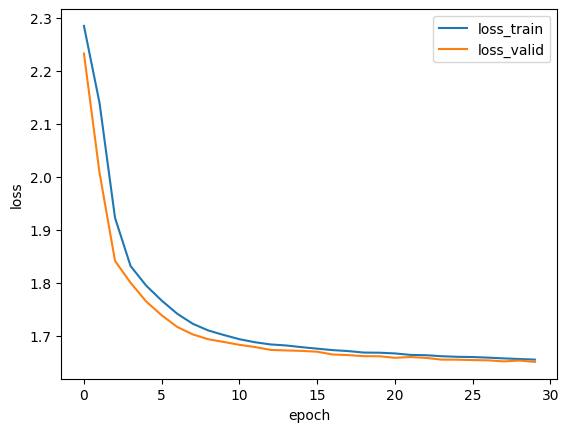

In [71]:
# instantiate model and move to device:
model = CustomNetwork().to(device)

# train model:
history = fit(model, loader_train, loader_valid, epochs=30, lr=.01)

# plot history:
history[['loss_train', 'loss_valid']].plot(xlabel='epoch', ylabel='loss')

In [73]:
#评估该图：我们的训练集损失和测试集损失差不多，比较贴合，
#没有过拟合发生；并且两个线都在稳步下降，说明我们的模型在学习，误差在变小

**Evaluation**: `evaluate` will return the metric scores!

In [72]:
evaluate(model, loader_test) #evaluate on the test set

{'f1': 0.7770619877272422}

In [ ]:
#有没有想过我们的测试集，训练集，评估集都在干什么？
#我们训练神经网络模型有2阶段，第一个是模型调试阶段，
#我们的模型使用训练集训练n回，每一次都使用评估集进行一次的评估，得到评估的分数
#在进行完了训练评估过程后，绘图查看到我们的loss反复跳变的点后，
#就可以证明，我们的最佳参数就在这个范围内

How does SGD work?

<img src="https://pantelis.github.io/cs677/docs/common/lectures/optimization/sgd/images/gradient-descent.png" alt="gradient-descent.png" style="width:500px;"/>

Can be improved by:
 - ... reducing the stepsize (i.e. `lr`) towards the end
 - ... using momentum to keep a clear trajectory

---

<span style="color:red"><b>TASK 4</b> - Improved Training:</span>

---

Improve the above training loop with the following steps:
1. replace the very basic SGD optimizer with the momentum-based [`torch.optim.Adam`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) optimizer. Compare how the learning curves change after this step. **As ADAM is more sensitive to the learning rate, set it to `0.001` after changing the optimizer!**
2. add a [`torch.optim.lr_scheduler.LinearLR`](https://pytorch.org/docs/stable/generated/torch.optim.lr_scheduler.LinearLR.html) scheduler (_start: `1.0*lr`, end:`0.33*lr`, over 10 epochs_).  Compare how the learning curves change after this step.
3. add an **early stopping** functionality, that stops training when the validation loss has not improved for `patience` epochs and restores the model parameters to the ones achieving the best loss. **Use a patience of `5` to retrain the network.**

**Disclaimer:** *We will not check whether you actually compare the loss curves before and after adding a specific step. But we may ask about their impact in the final exam.*

In [96]:
def epoch(model, loader_train: DataLoader, optimizer: pt.optim.Optimizer, 
          loss_fn: Callable[[pt.Tensor, pt.Tensor], pt.Tensor], device):
    model.train()
    losses = []

    with pt.enable_grad():
        for X_batch, y_batch in loader_train:
            X_batch = X_batch.reshape(X_batch.shape[0], -1).to(device)
            y_batch = y_batch.to(device)

            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            loss.backward()
            optimizer.step()

            losses.append(loss.detach().cpu().numpy())
    
    return np.mean(losses)


def evaluate(model, loader_valid: DataLoader, device, 
             loss_fn: Optional[Callable[[pt.Tensor, pt.Tensor], pt.Tensor]] = None):
    model.eval()
    labels = []
    predictions = []
    losses = []

    with pt.no_grad():
        for X_batch, y_batch in loader_valid:
            X_batch = X_batch.reshape(X_batch.shape[0], -1).to(device)
            y_batch = y_batch.to(device)

            y_pred = model(X_batch)
            labels.extend(y_batch.detach().cpu().numpy())
            predictions.extend(y_pred.detach().cpu().numpy())

            if loss_fn is not None:
                losses.append(loss_fn(y_pred, y_batch).detach().cpu().numpy())

    f1 = f1_score(
        np.array(labels),
        np.array(predictions).argmax(axis=1),
        average='macro'
    )

    if loss_fn is None:
        return {'f1': f1}
    else:
        return {'loss': np.mean(losses), 'f1': f1}


def fit(model, loader_train: DataLoader, loader_valid: DataLoader, 
        epochs: int, lr: float = 0.001, patience: int = 5, device: str = 'cpu'):
    #修改了函数的默认值，我们现在不输入也有默认值可以使用了，默认值为0.001学习率
    optimizer = pt.optim.Adam(model.parameters(), lr=lr)
    #这里是进行的学习率变化，参数分别是：优化器，开始系数，停止系数，
    #总共多少个epoch后完成，其中我们的学习率会通过（系数 * 学习率）得到
    scheduler = pt.optim.lr_scheduler.LinearLR(optimizer, start_factor=1.0, end_factor=0.33, total_iters=10)
    loss_fn = pt.nn.CrossEntropyLoss()
    history = []

    best_loss = float('inf')
    best_model = {k: v.clone() for k, v in model.state_dict().items()}
    patience_counter = 0

    for i in range(epochs):
        loss_train = epoch(model, loader_train, optimizer, loss_fn, device)
        metrics = evaluate(model, loader_valid, device, loss_fn)

        history.append({
            'epoch': i,
            'loss_train': loss_train,
            'loss_valid': metrics['loss'],
            'f1_valid': metrics['f1']
        })
        #这里判断我们的loss是否更优，如果是储存loss并且回储存我们当前的模型
        if metrics['loss'] < best_loss:
            best_loss = metrics['loss']
            #这里直接把我们的模型的参数保存下来了，加载时使用load_state_dict(模型)即可,
            #state_dict方法是每一个实现了
            #PyTorch 中每个 nn.Module（包括你自定义的模型类）自带的方法
            #deepcopy是复制我们的对象的所有的内容，层级结构以及参数，用在（状态保存、结构嵌套的内容）
            #copy只会复制最外层的，并且copy内部实际上是指针结构，
            #所以说数据结构等用deepcopy，copy一般用在（简单结构，单层数据）
            best_model = copy.deepcopy(model.state_dict())
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                break

        scheduler.step()

    model.load_state_dict(best_model)
    return pd.DataFrame(history)

### 以上三点的提升：
1.使用了另外的优化器，我们的模型会收敛的更快，每一个参数都会自动适配学习率，对学习率不敏感，一般设置为0.001
\
2.添加了学习率调度器，是我们的学习率慢慢变化，不至于容易错过最佳点

3.添加了了提前停止功能，我们的模型在达到阈值次数没有明显的变化后，便会停止然后输出有着良好表现的模型

---

*End of Task 4. Copy your final code to **Homework 2 - Code** on **NextIlearn***

### Section 4: Other useful and frequently used functions

Save and load the model.

**Option 1:** `torch.save(...)` / `torch.load(...)`

In [ ]:
pt.save(model, 'model.pt')

In [ ]:
# this saves a zipfile!
!unzip model.pt

In [ ]:
model = pt.load('model.pt', weights_only=False) # "weights_only = True" only loads PyTorch Tensors in the model file!
summary(model, input_size=(784,))

**Option 2:** save/load state_dict

In [ ]:
import pickle

In [ ]:
with open('model_state_dict.pkl', 'wb') as f:
  pickle.dump(model.state_dict(), f)

In [ ]:
with open('model_state_dict.pkl', 'rb') as f:
  state_dict = pickle.load(f)
model.load_state_dict(state_dict)
summary(model, input_size=(784,))

---

<span style="color:red"><b>TASK 5</b> - Regression MLP</span>

---

We have created a classification model on Fashion MNIST with PyTorch. In addition, we can of course use similar PyTorch models to solve regression tasks. **How can we do that?** Which part should we change to make it work on regression tasks? That would be our last task in this lab. Based on your knowledge from the second lecture, you may be able to figure out which part you need to change.

Create a regression model by adapting the PyTorch model we used above and train it on the [california housing dataset](https://nextilearn.dsv.su.se/mod/resource/view.php?id=25386 ).
You may need to change **a loss function** and input / output layers as we no longer deal with images and classification. Feel free to use scikit-learn but we still recommend you to practice preprocessing with NumPy for your skills.

**Upload the resulting predictions to NextIlearn. Your model should achieve an MSE < XXX to pass.**


1. Get training and test data:

In [10]:
# 1.1 download https://www.google.com/url?q=https%3A%2F%2Fnextilearn.dsv.su.se%2Fmod%2Fresource%2Fview.php%3Fid%3D25386 to data.zip

# 1.2 unzip data.zip
#!unzip data.zip

# 1.3 check files:
os.listdir('data/data/task5')

['data_test.csv', 'data_train.csv', 'description.md', 'labels_train.csv']

2. Create Data Pipeline:

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 2.1 load training data:
data_train = pd.read_csv('data/data/task5/data_train.csv', index_col=0)
labels_train = pd.read_csv('data/data/task5/labels_train.csv', index_col=0)

# 2.2 load test data (no labels):
data_test = pd.read_csv('data/data/task5/data_test.csv', index_col=0)

#...
X = data_train.values
y = labels_train.values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test = scaler.transform(data_test.values)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

3. Create Model:

In [21]:
#...
import torch 
import torch.nn as nn 
from torch.utils.data import DataLoader, TensorDataset

X_train_tensor = torch.tensor(X_train, dtype= torch.float32)
y_train_tensor = torch.tensor(y_train, dtype= torch.float32)
X_val_tensor = torch.tensor(X_val, dtype= torch.float32)
y_val_tensor = torch.tensor(y_val, dtype= torch.float32)

X_test_tensor = torch.tensor(X_test, dtype= torch.float32)

train_ds = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)

class MLPprocessor(nn.Module):
    def __init__(self, inputdim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(inputdim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.net(x)

model = MLPprocessor(inputdim= X.shape[1])       

4. Train model on `data_train` and `labels_train`:

In [22]:
#...
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(100):
    model.train()
    for xb, yb in train_loader:
        pred = model(xb).squeeze()
        loss = criterion(pred, yb.squeeze())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if epoch % 10 == 0:
        model.eval()
        with torch.no_grad():
            val_pred = model(X_val_tensor).squeeze()
            val_loss = criterion(val_pred, y_val_tensor.squeeze())
            print(f"Epoch {epoch}, Validation MSE: {val_loss.item():.4f}")


Epoch 0, Validation MSE: 0.5046
Epoch 10, Validation MSE: 0.3093
Epoch 20, Validation MSE: 0.2901
Epoch 30, Validation MSE: 0.2899
Epoch 40, Validation MSE: 0.2868
Epoch 50, Validation MSE: 0.3068
Epoch 60, Validation MSE: 0.2851
Epoch 70, Validation MSE: 0.3024
Epoch 80, Validation MSE: 0.3084
Epoch 90, Validation MSE: 0.2743


5. Predict `data_test` and save predictions to `submission.csv`:

In [29]:
model.eval()

with torch.no_grad():
    predictions = model(X_test_tensor)

pd.DataFrame(predictions.detach().cpu().numpy(), columns=['predictions']).to_csv('submission.csv', index=True, encoding='utf-8')

df_check = pd.read_csv('submission.csv')
print(df_check.columns.tolist())


['Unnamed: 0', 'predictions']


---

*End of Task 5. Upload your final predictions (the file* `submission.csv` *) to **Homework 2 - Code** on **NextIlearn***